In [74]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [75]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/LC/100/'
replicate='linearCombination_25_3_0-17-47-7061/'
filename='fitnesses.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)

Filepath: /home/ebb505/ARE_Project/are-logs/LC/100/linearCombination_25_3_0-17-47-7061/fitnesses.csv


In [76]:
# Import data from csv
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[1:-1]) # Last character is empty for some reason

In [77]:
# Estimate average for each generation
generations = len(my_list)
population = len(my_list[0])

print("Population: ", population, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array

Population:  25 Generations:  1151


In [78]:
genFitAve = []
genMaxFit = []
genMedFit = []
for i in range(generations):
    average = 0;
    for j in range(population):
        average = average + dat[i][j]
    average = average / population
    genFitAve.append(average)
    genMedFit.append(statistics.median(dat[i]))
    genMaxFit.append(max(dat[i]))
#print(genFitAve)
genMaxFit = [float(i) for i in genMaxFit]
#print(genMaxFit)

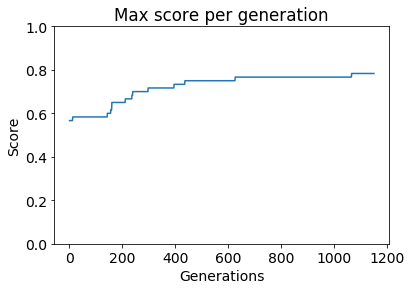

In [79]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

xValues = list(range(1, generations+1))
# dashedLine = [1.5] * numGenerations
plt.plot(xValues, genMaxFit)
# plt.plot(xValues, dashedLine, '--')
plt.xlabel('Generations')
plt.ylabel('Score')
axes = plt.gca()
axes.set_ylim([0,1.0])
plt.title("Max score per generation")
# #plt.show()
# plt.savefig('HighestFitness.png')
plt.savefig(repository+replicate+'fitness.png',dpi=200)